In [1]:
import xlrd
import numpy as np

#read class
def readTranscript(filename='genes_transcript.xlsx'):
    sheet = xlrd.open_workbook(filename).sheet_by_index(0)
    nRows = sheet.nrows
    my_class_label = []
    my_class_value = []
    for rowNum in range(0,nRows):
        rowList = []
        row = sheet.row_values(rowNum)
        rowLabel = row.pop(0)
        my_class_label.append([rowLabel])
        for el in row:
            rowList.append([el])
        rowList = np.array(rowList)
        my_class_value.append(rowList)
    my_class_label = np.array(my_class_label)
    my_class_value = np.array(my_class_value)
    #print(my_class_label)
    #print(my_class_value)
    return my_class_label, my_class_value

#read data
def readData(filename='gene_data.xlsx'):
    sheet = xlrd.open_workbook(filename).sheet_by_index(0)
    nRows = sheet.nrows
    my_data_value = []
    for rowNum in range(0,nRows):
        rowList = []
        row = sheet.row_values(rowNum)
        for el in row:
            rowList.append([el])
        rowList = np.array(rowList)
        my_data_value.append(rowList)
    my_data_value = np.array(my_data_value)
    #print(my_data_value)
    return my_data_value

class_name, class_value = readTranscript()
data_value = readData()

In [2]:
#Chi square feature selection

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2


In [3]:
data = np.copy(data_value)
#print(data)

In [4]:
#remove header(name of each sample)
data = np.delete(data, 0,axis=0)
#print(data1)

#remove first row(ID row)
data = np.delete(data, 0, axis=1)
#print(data2)

#turn 3dd list to 2d list
#print(data2.shape)
data = np.reshape(data, (data.shape[0], data.shape[1],))
#print(data3.shape)

#data to match the class
data = data.transpose()
#print(data4)

#change from str to float
data_float = data.astype(np.float)
#print(data_float)

In [5]:
#select gleason (total) score
y = class_value[3]
#print(y)

#change from str to float
y_float = y.astype(np.float)
#print(y_float)

#reshape y to 1d
y_float = np.reshape(y_float, (y_float.shape[0]))


In [9]:
y_float_class = []
for i in range(0, y_float.shape[0]):
    if y_float[i] < 6:    #group1 1-5
        y_float_class.append(1.0)
    elif y_float[i] < 7:  #group2 6
        y_float_class.append(2.0)
    elif y_float[i] < 8:  #group3 7
        y_float_class.append(3.0)
    elif y_float[i] < 10: #group4 8
        y_float_class.append(4.0)
    else:                 #group5 10
        y_float_class.append(5.0)
        

In [17]:
print (y_float_class)

[4. 2. 4. 3. 4. 3. 2. 2. 4. 3. 2. 3. 3. 4. 3. 3. 3. 3. 3. 3. 5. 4. 4. 4.
 4. 3. 3. 3. 3. 3. 3. 2. 4. 3. 4. 3. 3. 3. 3. 4. 3. 3. 4. 3. 3. 3. 3. 3.
 3. 4. 3. 3. 4. 4. 3. 3. 3. 3. 3. 4. 3. 3. 2. 4. 4. 3. 3. 4. 4. 4. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3. 4. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 3. 3. 4. 4. 3. 4. 4.
 4. 2. 4. 3. 3. 3. 3. 4. 3. 4. 3. 3. 3. 4. 3. 4. 2. 2. 3. 4. 4. 4. 3. 3.
 2. 3. 3. 3. 3. 3. 3. 2. 3. 2. 3. 3. 3. 3. 4. 3. 3. 3. 3. 3. 3. 4. 3. 3.
 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 2. 4. 3. 4. 3. 5. 3. 4. 4. 4. 3. 2. 3.
 2. 2. 3. 3. 3. 4. 2. 3. 3. 3. 4. 3. 3. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2.
 3. 3. 3. 3. 3. 4. 3. 4. 2. 3. 3. 3. 2. 2. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 3. 3. 4. 4. 4. 3. 2. 4. 3. 3. 3. 3. 3.
 3. 3. 2. 3. 3. 3. 4. 4. 3. 3. 3. 2. 3. 3. 3. 2. 4. 2. 4. 4. 4. 4. 4. 4.
 4. 2. 3. 3. 3. 4. 4. 3. 3. 3. 3. 3. 3. 4. 4. 4. 3. 4. 3. 4. 4. 3. 3. 3.
 3. 4. 4. 4. 4. 3. 4. 3. 3. 3. 3. 4. 3. 4. 4. 4. 3.

In [18]:
#train test split
#from sklearn.model_selection import train_test_split
#train_data, test_data, train_class, test_class = train_test_split(X, y_float, test_size=0.1, random_state=20201217)
y_float_class = np.array(y_float_class)
print(y_float_class.shape)

(494,)


In [19]:
#max feature selected/ calculated
max_feature_chi = 100
max_feature_mutualInfo = 100
max_feature_ftest_firstpeak = 100

In [20]:
#calculate chi square and sort the column according to the scores
selector = SelectKBest(chi2, k=max_feature_chi).fit(data_float, y_float_class)
x_new = selector.transform(data_float)
selector_scores = selector.scores_
#print(selector_scores)
#print(x_new.shape)
Z = [elx for _,elx in sorted(zip(selector_scores,x_new), reverse=True)]

Zchi = np.array(Z)
print(Zchi.shape)

In [21]:
#cross val with chi square
import warnings
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import cross_val_score

svmClassifier = svm.SVC(kernel='poly', degree=5)

#disable warning
warnings.filterwarnings(action='ignore')

chisq_scoreList = []
for fea in range(1, max_feature_chi+1):
    Xfea = Zchi[:,:fea]
    
    scores = cross_val_score(svmClassifier, Xfea, y_float_class, cv=10)
    chisq_scoreList.append(scores[-1])


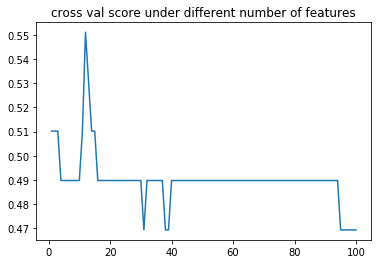

In [22]:
#plot result
#print(chisq_scoreList)
plt.figure()
plt.title('cross val score under different number of features')
plt.plot(range(1,max_feature_chi+1),chisq_scoreList )
plt.show()

In [23]:
#mutual information feature selection
from sklearn.feature_selection import mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=max_feature_mutualInfo).fit(data_float, y_float_class)
x_new = selector.transform(data_float)

selector_scores = selector.scores_
#print(selector_scores)

In [24]:
Z = []
for x_row in x_new:
    z = [elx for _,elx in sorted(zip(selector_scores, x_row), reverse=True)]
    Z.append(np.array(z))
ZmutalInfo = np.array(Z)
#print(ZmutalInfo)

In [25]:
#cross val with mutual info
import warnings
from matplotlib import pyplot as plt

svmClassifier = svm.SVC(kernel='poly', degree=5)

#disable warning
warnings.filterwarnings(action='ignore')

mutualInfo_scoreList = []
for fea in range(1, max_feature_mutualInfo+1):
    Xfea = ZmutalInfo[:,:fea]
    
    scores = cross_val_score(svmClassifier, Xfea, y_float_class, cv=10)
    mutualInfo_scoreList.append(scores[-1])

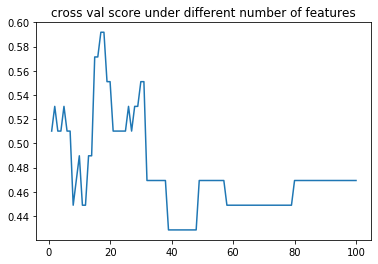

In [26]:
#plot result
#print(mutualInfo_scoreList)
plt.figure()
plt.title('cross val score under different number of features')
plt.plot(range(1,max_feature_mutualInfo+1),mutualInfo_scoreList )
plt.show()

In [27]:
max_feature_ftest_secondpeak_start = 300
max_feature_ftest_secondpeak_end = 400

In [28]:
#f test feature selection
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=max_feature_ftest_secondpeak_end).fit(data_float, y_float_class)
x_new = selector.transform(data_float)
selector_scores = selector.scores_
#print(selector_scores)

In [29]:
Z = []
for x_row in x_new:
    z = [elx for _,elx in sorted(zip(selector_scores, x_row), reverse=True)]
    Z.append(np.array(z))

Zftest = np.array(Z)
#print(Zftest)

In [31]:
#cross val with f test
import warnings
from matplotlib import pyplot as plt

svmClassifier = svm.SVC(kernel='poly', degree=5)

#disable warning
warnings.filterwarnings(action='ignore')

f_test_scoreList = []
for fea in range(1, max_feature_ftest_firstpeak+1):
    Xfea = Zftest[:,:fea]
    
    scores = cross_val_score(svmClassifier, Xfea, y_float_class, cv=10)
    f_test_scoreList.append(scores[-1])

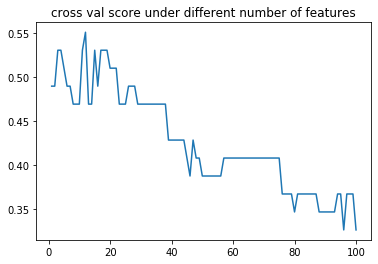

In [32]:
#plot result
#print(f_test_scoreList)
plt.figure()
plt.title('cross val score under different number of features')
plt.plot(range(1,max_feature_ftest_firstpeak+1),f_test_scoreList )
plt.show()

In [33]:
#cross val with f test
import warnings
from matplotlib import pyplot as plt

svmClassifier = svm.SVC(kernel='poly', degree=5)

#disable warning
warnings.filterwarnings(action='ignore')

f_test_scoreList_second = []
for fea in range(max_feature_ftest_secondpeak_start, max_feature_ftest_secondpeak_end+1):
    Xfea = Zftest[:,:fea]
    
    scores = cross_val_score(svmClassifier, Xfea, y_float_class, cv=10)
    f_test_scoreList_second.append(scores[-1])

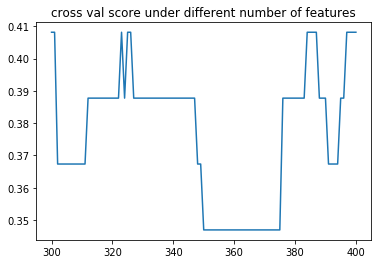

In [34]:
#plot result
#print(f_test_scoreList)
plt.figure()
plt.title('cross val score under different number of features')
plt.plot(range(max_feature_ftest_secondpeak_start,max_feature_ftest_secondpeak_end+1),f_test_scoreList_second )
plt.show()

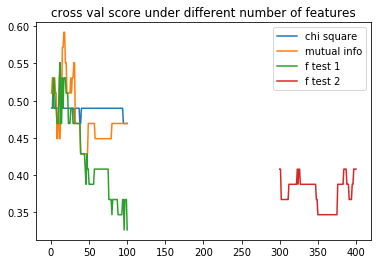

In [36]:
plt.figure()
plt.title('cross val score under different number of features')
plt.plot(range(1,max_feature_chi+1),chisq_scoreList, label='chi square' )
plt.plot(range(1,max_feature_mutualInfo+1),mutualInfo_scoreList, label='mutual info' )
plt.plot(range(1,max_feature_ftest_firstpeak+1),f_test_scoreList, label='f test 1' )
plt.plot(range(max_feature_ftest_secondpeak_start,max_feature_ftest_secondpeak_end+1),f_test_scoreList_second, label='f test 2' )

plt.legend()
plt.show()

In [43]:
maxchisq = np.amax(chisq_scoreList)
maxchisqindex = np.where(chisq_scoreList == np.amax(maxchisq))
maxmutualinfo = np.amax(mutualInfo_scoreList)
maxmutualinfoindex = np.where(mutualInfo_scoreList == np.amax(maxmutualinfo))
maxftest = np.amax(f_test_scoreList)
maxftestindex = np.where(f_test_scoreList == np.amax(maxftest))
print("best score for chi square is:"+str(maxchisq)+" with number of features:"+str(maxchisqindex[0]+1))

print("best score for mutual information is:"+str(maxmutualinfo)+" with number of features:"+str(maxmutualinfoindex[0]+1))

print("best score for f test is:"+str(maxftest)+" with number of features:"+str(maxftestindex[0]+1))


best score for chi square is:0.5510204081632653 with number of features:[12]
best score for mutual information is:0.5918367346938775 with number of features:[17 18]
best score for f test is:0.5510204081632653 with number of features:[12]
